In [17]:
import project1 as p1
import utils
import numpy as np
import random
from string import punctuation, digits


In [18]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')


In [19]:



def get_order(n_samples):
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))




def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        `feature_vector` - numpy array describing the given data point.
        `label` - float, the correct classification of the data
            point.
        `theta` - numpy array describing the linear classifier.
        `theta_0` - float representing the offset parameter.
    Returns:
        the hinge loss, as a float, associated with the given data point and
        parameters.
    """
    # Your code here

    return max(0, 1 - label * (np.dot(theta, feature_vector) + theta_0))

    raise NotImplementedError



def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the hinge loss for given classification parameters averaged over a
    given dataset

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `theta` - numpy array describing the linear classifier.
        `theta_0` - real valued number representing the offset parameter.
    Returns:
        the hinge loss, as a float, associated with the given dataset and
        parameters.  This number should be the average hinge loss across all of
    """

    # Your code here

    total = 0.0
    for i in range(len(labels)):
        total += hinge_loss_single(feature_matrix[i], labels[i], theta, theta_0)
    return total / len(labels)

    raise NotImplementedError




def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Updates the classification parameters `theta` and `theta_0` via a single
    step of the perceptron algorithm.  Returns new parameters rather than
    modifying in-place.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.
    Returns a tuple containing two values:
        the updated feature-coefficient parameter `theta` as a numpy array
        the updated offset parameter `theta_0` as a floating point number
    """
    # Your code here

    if label * (np.dot(feature_vector, current_theta) +current_theta_0)<= 0:
        current_theta = current_theta + label*feature_vector
        current_theta_0 = current_theta_0 + label

    return current_theta, current_theta_0
    raise NotImplementedError



def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set: we do not stop early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns a tuple containing two values:
        the feature-coefficient parameter `theta` as a numpy array
            (found after T iterations through the feature matrix)
        the offset parameter `theta_0` as a floating point number
            (found also after T iterations through the feature matrix).
    """
    # Your code here
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0


    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)
    # Your code here
    return theta, theta_0
    raise NotImplementedError



def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given dataset.  Runs `T`
    iterations through the dataset (we do not stop early) and therefore
    averages over `T` many parameter values.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: It is more difficult to keep a running average than to sum and
    divide.

    Args:
        `feature_matrix` -  A numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns a tuple containing two values:
        the average feature-coefficient parameter `theta` as a numpy array
            (averaged over T iterations through the feature matrix)
        the average offset parameter `theta_0` as a floating point number
            (averaged also over T iterations through the feature matrix).
    """
    # Your code here

    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0

    theta_sum = np.zeros(feature_matrix.shape[1])
    theta_0_sum = 0

    total_updates = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)
            theta_sum += theta
            theta_0_sum += theta_0
            total_updates += 1


    return theta_sum / total_updates, theta_0_sum / total_updates
    raise NotImplementedError



def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        theta,
        theta_0):
    """
    Updates the classification parameters `theta` and `theta_0` via a single
    step of the Pegasos algorithm.  Returns new parameters rather than
    modifying in-place.

    Args:
        `feature_vector` - A numpy array describing a single data point.
        `label` - The correct classification of the feature vector.
        `L` - The lamba value being used to update the parameters.
        `eta` - Learning rate to update parameters.
        `theta` - The old theta being used by the Pegasos
            algorithm before this update.
        `theta_0` - The old theta_0 being used by the
            Pegasos algorithm before this update.
    Returns:
        a tuple where the first element is a numpy array with the value of
        theta after the old update has completed and the second element is a
        real valued number with the value of theta_0 after the old updated has
        completed.
    """
    # Your code here

    if label * (np.dot(feature_vector, theta) + theta_0) <= 1:
        theta = (1 - eta*L)*theta + eta*feature_vector*label
        theta_0 = theta_0 + eta*label
    else:
        theta = (1 - eta*L)*theta
    
    return theta, theta_0
    raise NotImplementedError





def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T iterations
    through the data set, there is no need to worry about stopping early.  For
    each update, set learning rate = 1/sqrt(t), where t is a counter for the
    number of updates performed so far (between 1 and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.  Do
    not copy paste code from previous parts.

    Args:
        `feature_matrix` - A numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        `L` - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns:
        a tuple where the first element is a numpy array with the value of the
        theta, the linear classification parameter, found after T iterations
        through the feature matrix and the second element is a real number with
        the value of the theta_0, the offset classification parameter, found
        after T iterations through the feature matrix.
    """
    # Your code here
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 =  0

    update_count = 1

    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            eta = 1 / np.sqrt(update_count)
            theta, theta_0 = pegasos_single_step_update(feature_matrix[i], labels[i], L, eta, theta, theta_0)
            update_count += 1

    return theta, theta_0

    raise NotImplementedError



#==============================================================================
#===  PART II  ================================================================
#==============================================================================



##  #pragma: coderesponse template
##  def decision_function(feature_vector, theta, theta_0):
##      return np.dot(theta, feature_vector) + theta_0
##  def classify_vector(feature_vector, theta, theta_0):
##      return 2*np.heaviside(decision_function(feature_vector, theta, theta_0), 0)-1
##  #pragma: coderesponse end



def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses given parameters to classify a set of
    data points.

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `theta` - numpy array describing the linear classifier.
        `theta_0` - real valued number representing the offset parameter.

    Returns:
        a numpy array of 1s and -1s where the kth element of the array is the
        predicted classification of the kth row of the feature matrix using the
        given theta and theta_0. If a prediction is GREATER THAN zero, it
        should be considered a positive classification.
    """
    # Your code here
    scores = np.dot(feature_matrix, theta) + theta_0

    return np.where(scores > 0, 1 ,-1)

    raise NotImplementedError


def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.  The classifier is
    trained on the train data.  The classifier's accuracy on the train and
    validation data is then returned.

    Args:
        `classifier` - A learning function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        `train_feature_matrix` - A numpy matrix describing the training
            data. Each row represents a single data point.
        `val_feature_matrix` - A numpy matrix describing the validation
            data. Each row represents a single data point.
        `train_labels` - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        `val_labels` - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        `kwargs` - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns:
        a tuple in which the first element is the (scalar) accuracy of the
        trained classifier on the training data and the second element is the
        accuracy of the trained classifier on the validation data.
    """
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)

    # Predict labels for training and validation sets
    train_predictions = classify(train_feature_matrix, theta, theta_0)
    val_predictions = classify(val_feature_matrix, theta, theta_0)

    # Compute accuracy as the fraction of correct predictions
    train_accuracy = np.mean(train_predictions == train_labels)
    val_accuracy = np.mean(val_predictions == val_labels)
    
    return train_accuracy, val_accuracy

    raise NotImplementedError



def extract_words(text):
    """
    Helper function for `bag_of_words(...)`.
    Args:
        a string `text`.
    Returns:
        a list of lowercased words in the string, where punctuation and digits
        count as their own words.
    """
    # Your code here
    # raise NotImplementedError

    for c in punctuation + digits:
        text = text.replace(c, ' ' + c + ' ')
    return text.lower().split()



def bag_of_words(texts, remove_stopword=True):
    """
    NOTE: feel free to change this code as guided by Section 3 (e.g. remove
    stopwords, add bigrams etc.)

    Args:
        `texts` - a list of natural language strings.
    Returns:
        a dictionary that maps each word appearing in `texts` to a unique
        integer `index`.
    """
    # Your code here
    # raise NotImplementedError
    
    stopwords = set()  # Initialize stopwords set

    # Load stopwords from stopwords.txt
    with open("stopwords.txt", "r") as f:
        stopwords = set(f.read().splitlines())  # Read stopwords into a set

    indices_by_word = {}  # Maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if remove_stopword and word in stopwords:  # Ignore stopwords
                continue
            if word not in indices_by_word:
                indices_by_word[word] = len(indices_by_word)

    return indices_by_word



def extract_bow_feature_vectors(reviews, indices_by_word, binarize=False):
    """
    Args:
        `reviews` - a list of natural language strings
        `indices_by_word` - a dictionary of uniquely-indexed words.
    Returns:
        a matrix representing each review via bag-of-words features.  This
        matrix thus has shape (n, m), where n counts reviews and m counts words
        in the dictionary.
    """
    # Your code here
    feature_matrix = np.zeros([len(reviews), len(indices_by_word)], dtype=np.float64)

    for i, text in enumerate(reviews):
        word_list = extract_words(text)  # Tokenize words from the review
        for word in word_list:
            if word in indices_by_word:
                feature_matrix[i, indices_by_word[word]] += 1  # Store word count

    if binarize:
        feature_matrix[feature_matrix > 0] = 1  # Convert to binary (one-hot encoding)

    return feature_matrix



def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the fraction of predictions that are correct.
    """
    return (preds == targets).mean()


theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


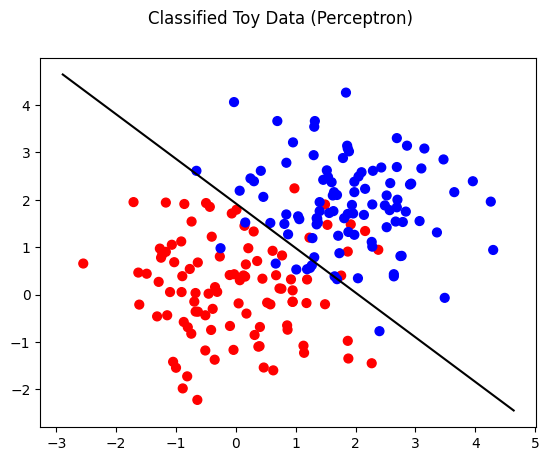

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


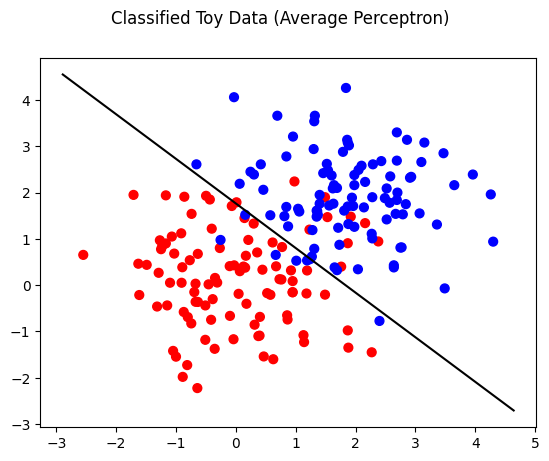

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


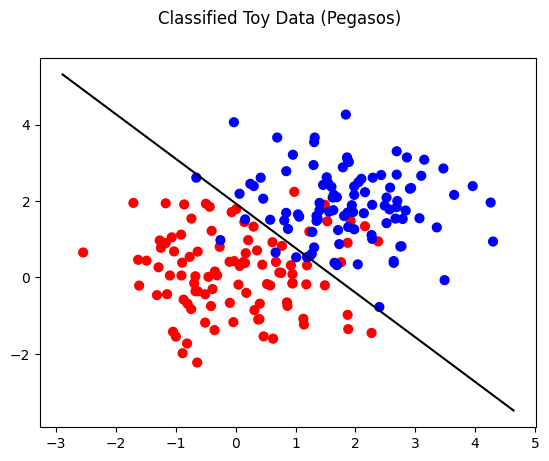

In [20]:
T = 10
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)


In [21]:

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = bag_of_words(train_texts)

train_bow_features = extract_bow_feature_vectors(train_texts, dictionary, binarize=True)
val_bow_features = extract_bow_feature_vectors(val_texts, dictionary, binarize=True)
test_bow_features = extract_bow_feature_vectors(test_texts, dictionary, binarize=True)


In [22]:

T = 10  # Number of iterations

train_acc_perceptron, val_acc_perceptron = classifier_accuracy(
    perceptron, train_bow_features, val_bow_features, train_labels, val_labels, T=T
)

print(f"Train Accuracy (Perceptron): {train_acc_perceptron:.4f}")
print(f"Validation Accuracy (Perceptron): {val_acc_perceptron:.4f}")


Train Accuracy (Perceptron): 0.9832
Validation Accuracy (Perceptron): 0.7600


In [23]:
T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
   classifier_accuracy(perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
   classifier_accuracy(average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
   classifier_accuracy(pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))


Training accuracy for perceptron:   0.9832
Validation accuracy for perceptron: 0.7600
Training accuracy for average perceptron:   0.9868
Validation accuracy for average perceptron: 0.7760
Training accuracy for Pegasos:                     0.9123
Validation accuracy for Pegasos:                   0.7860


perceptron valid: [(1, 0.722), (5, 0.762), (10, 0.76), (15, 0.762), (25, 0.748), (50, 0.774)]
best = 0.7740, T=50.0000
avg perceptron valid: [(1, 0.78), (5, 0.778), (10, 0.776), (15, 0.778), (25, 0.782), (50, 0.776)]
best = 0.7820, T=25.0000
Pegasos valid: tune T [(1, 0.748), (5, 0.78), (10, 0.786), (15, 0.786), (25, 0.788), (50, 0.788)]
best = 0.7880, T=25.0000
Pegasos valid: tune L [(0.001, 0.78), (0.01, 0.788), (0.1, 0.756), (1, 0.53), (10, 0.518)]
best = 0.7880, L=0.0100


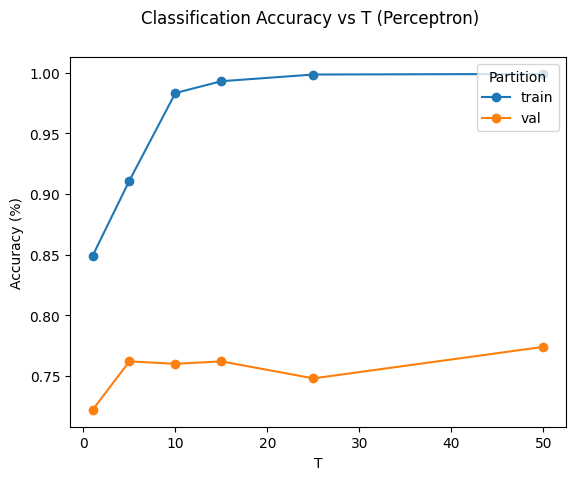

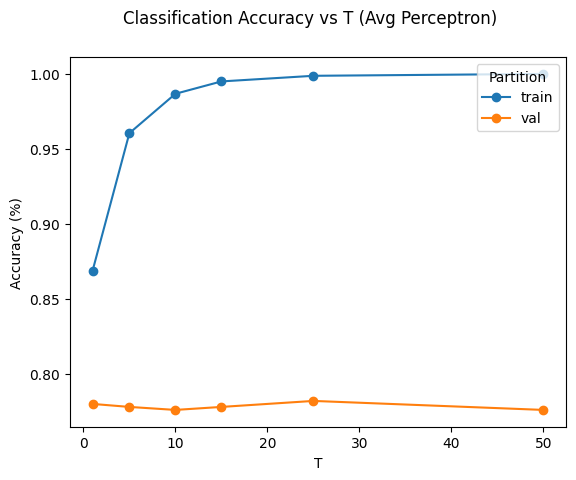

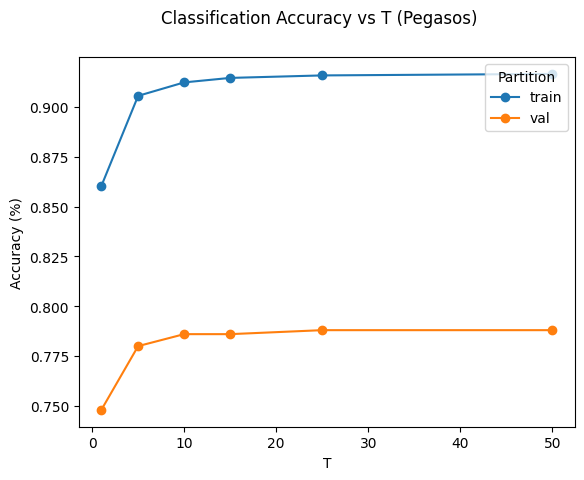

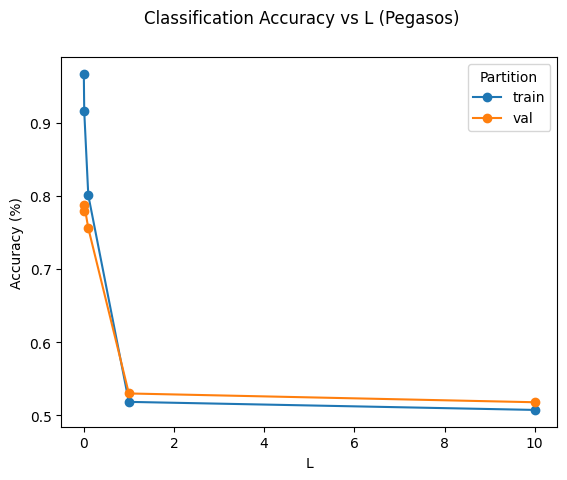

In [24]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

 # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

In [25]:
# Run the best model on the test set
test_acc_pegasos = classifier_accuracy(pegasos, train_bow_features, test_bow_features, train_labels, test_labels, T=25, L= 0.01)[1]

print(f"Test Accuracy (Pegasos): {test_acc_pegasos:.4f}")


Test Accuracy (Pegasos): 0.8080


In [26]:
theta, theta_0 = pegasos(train_bow_features, train_labels, T=25, L=0.01)
top_words = utils.most_explanatory_word(theta, list(dictionary.keys()))
print("Top 10 most explanatory words:", top_words[:10])


Top 10 most explanatory words: ['delicious', 'great', 'loves', '!', 'best', 'perfect', 'excellent', 'wonderful', 'favorite', 'tasty']


In [27]:
# Dictionary without stopwords removed
dictionary_original = bag_of_words(train_texts, remove_stopword=False)

# Dictionary with stopwords removed
dictionary_no_stopwords = bag_of_words(train_texts, remove_stopword=True)

# Extract features for both cases
train_bow_original = extract_bow_feature_vectors(train_texts, dictionary_original, binarize=True)
val_bow_original = extract_bow_feature_vectors(val_texts, dictionary_original, binarize=True)
test_bow_original = extract_bow_feature_vectors(test_texts, dictionary_original, binarize=True)

train_bow_no_stopwords = extract_bow_feature_vectors(train_texts, dictionary_no_stopwords, binarize=True)
val_bow_no_stopwords = extract_bow_feature_vectors(val_texts, dictionary_no_stopwords, binarize=True)
test_bow_no_stopwords = extract_bow_feature_vectors(test_texts, dictionary_no_stopwords, binarize=True)


In [28]:
T = 25  # Number of iterations
L = 0.01  # Regularization parameter

# Train on original dictionary
test_acc_original = classifier_accuracy(pegasos, train_bow_original, test_bow_original, train_labels, test_labels, T=T, L=L)[1]

# Train on dictionary with stopwords removed
test_acc_no_stopwords = classifier_accuracy(pegasos, train_bow_no_stopwords, test_bow_no_stopwords, train_labels, test_labels, T=T, L=L)[1]

print(f"Test Accuracy with Original Dictionary: {test_acc_original:.4f}")
print(f"Test Accuracy with Stopwords Removed: {test_acc_no_stopwords:.4f}")


Test Accuracy with Original Dictionary: 0.8020
Test Accuracy with Stopwords Removed: 0.8080


In [29]:
# Dictionary with stopwords removed
dictionary_no_stopwords = bag_of_words(train_texts, remove_stopword=True)

# Extract features using word counts instead of binary features
train_bow_counts = extract_bow_feature_vectors(train_texts, dictionary_no_stopwords, binarize=False)
val_bow_counts = extract_bow_feature_vectors(val_texts, dictionary_no_stopwords, binarize=False)
test_bow_counts = extract_bow_feature_vectors(test_texts, dictionary_no_stopwords, binarize=False)


In [30]:
T = 25  # Number of iterations
L = 0.01  # Regularization parameter

# Train Pegasos on count features
test_acc_counts = classifier_accuracy(pegasos, train_bow_counts, test_bow_counts, train_labels, test_labels, T=T, L=L)[1]

print(f"Test Accuracy with Stopwords Removed and Count Features: {test_acc_counts:.4f}")


Test Accuracy with Stopwords Removed and Count Features: 0.7700
